<a href="https://colab.research.google.com/github/srsydnor/DS4002P1/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
weather = "drive/MyDrive/ColabNotebooks/weather"
weather


'drive/MyDrive/ColabNotebooks/weather'

In [9]:
!pwd

/content


In [12]:
!cat drive/MyDrive/ColabNotebooks/weather/cloudy186.jpg

���� JFIF  ` `  �� C 
	
		
=)#)==================================================��  �" ��           	
�� �   } !1AQa"q2���#B��R��$3br�	
%&'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz���������������������������������������������������������������������������        	
�� �  w !1AQaq"2�B����	#3R�br�
$4�%�&'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz��������������������������������������������������������������������������   ? ���zvMQ�4ݴ姌E���OXAHA<- 19lWI����d�Pz
���n��zΡ��l�5I��>nqȨ�,x�@Ͷ�,����M���\f��
 ��LX��ye'��[$�_�kJKh�=�� d���.֫� �î���S[�r;
@\�>2���8�0��,�ɨ�Pef�������3J���zz)$b�4�,�І��췋
y�� �F*&w������n���*x8��%h��廜R-��[��$�X c�O�	c����5��F��Z!et����4�1$S���pN�Gp��!NETyU[*h�R?�7�M�Q��/s���^a�V*E�ǚ�ok��7ݩ(�HQҥ�_1�OZ�l���JU�G��0?*�{U��ع1�5^7e��5bK��ɠE����ԏz��TF�GS�S�@���46��s�=i�Y�j4�.Ԑ�%���4��2

In [13]:
type(weather)
img_height = 180
img_width = 180

In [14]:
import os

# Define the URL of your dataset (change to your dataset's URL)
dataset_url = weather

# Define the local directory to save and extract the dataset
data_dir = os.path.join(os.path.dirname(weather), 'weather')
data_dir


'drive/MyDrive/ColabNotebooks/weather'

In [15]:
import pathlib
import numpy as np
data_dir2 = pathlib.Path(weather)


In [16]:
image_size = (128, 128)  # Specify the desired image size
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for data augmentation
)
train_datagen

datagen = ImageDataGenerator(
    rotation_range=40,       # Rotate images up to 40 degrees
    width_shift_range=0.2,   # Shift width up to 20% of the image width
    height_shift_range=0.2,  # Shift height up to 20% of the image height
    shear_range=0.2,         # Shear transformations
    zoom_range=0.2,          # Zoom in up to 20%
    horizontal_flip=True,    # Flip horizontally
    fill_mode='nearest'      # Fill in missing pixels with the nearest available pixel
)


In [17]:
# Load and preprocess  data
# Replace these lines with your own data loading code
train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  validation_split=0.2, # splitting 80/20
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=30)
validation_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=30)


Found 121 files belonging to 3 classes.
Using 97 files for training.
Found 121 files belonging to 3 classes.
Using 24 files for validation.


In [18]:
image_count = len(list(data_dir2.glob('*/*.jpg'))) # counting total images in dataset
print(image_count)

121


In [19]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  validation_split=0.2, # splitting 80/20
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=30)

train_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  validation_split=0.15, # splitting 80/20
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=35)

Found 121 files belonging to 3 classes.
Using 97 files for training.
Found 121 files belonging to 3 classes.
Using 103 files for training.


In [20]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=30)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=35)

Found 121 files belonging to 3 classes.
Using 24 files for validation.
Found 121 files belonging to 3 classes.
Using 18 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['cloudy', 'rain', 'shine']


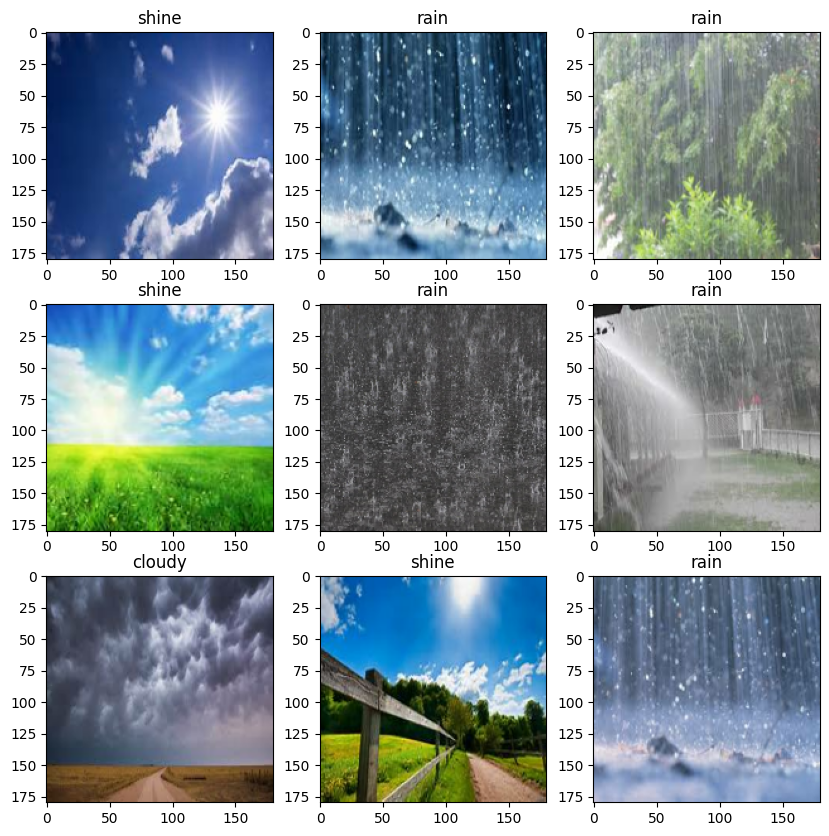

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Added softmax activation for classification
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [27]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

epochs = 10
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
4/4 [==============================] - 8s 2s/step - loss: 1.4014 - accuracy: 0.3196 - val_loss: 0.9151 - val_accuracy: 0.5833
Epoch 2/10
4/4 [==============================] - 4s 918ms/step - loss: 1.0030 - accuracy: 0.4639 - val_loss: 0.9463 - val_accuracy: 0.5833
Epoch 3/10
4/4 [==============================] - 4s 906ms/step - loss: 0.8839 - accuracy: 0.5876 - val_loss: 0.8823 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 5s 1s/step - loss: 0.6607 - accuracy: 0.7629 - val_loss: 0.6384 - val_accuracy: 0.7917
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 0.5470 - accuracy: 0.7835 - val_loss: 1.1543 - val_accuracy: 0.6250
Epoch 6/10
4/4 [==============================] - 4s 785ms/step - loss: 0.5252 - accuracy: 0.7423 - val_loss: 0.6486 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 4s 778ms/step - loss: 0.5051 - accuracy: 0.7629 - val_loss: 0.7467 - val_accuracy: 0.6667
Epoch 8/10
4/4 [=============

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 12s 2s/step - loss: 5.2727 - accuracy: 0.3196 - val_loss: 1.5080 - val_accuracy: 0.1250
Epoch 2/10
4/4 [==============================] - 9s 2s/step - loss: 1.1349 - accuracy: 0.4536 - val_loss: 1.0156 - val_accuracy: 0.4583
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 0.9472 - accuracy: 0.5464 - val_loss: 0.9056 - val_accuracy: 0.5833
Epoch 4/10
4/4 [==============================] - 11s 3s/step - loss: 0.7424 - accuracy: 0.6082 - val_loss: 0.8367 - val_accuracy: 0.5417
Epoch 5/10
4/4 [==============================] - 9s 2s/step - loss: 0.7779 - accuracy: 0.6495 - val_loss: 1.0044 - val_accuracy: 0.5833
Epoch 6/10
4/4 [==============================] - 10s 2s/step - loss: 0.6367 - accuracy: 0.6701 - val_loss: 0.8611 - val_accuracy: 0.5417
Epoch 7/10
4/4 [==============================] - 10s 3s/step - loss: 0.4492 - accuracy: 0.8247 - val_loss: 0.9546 - val_accuracy: 0.6250
Epoch 8/10
4/4 [==============================] 

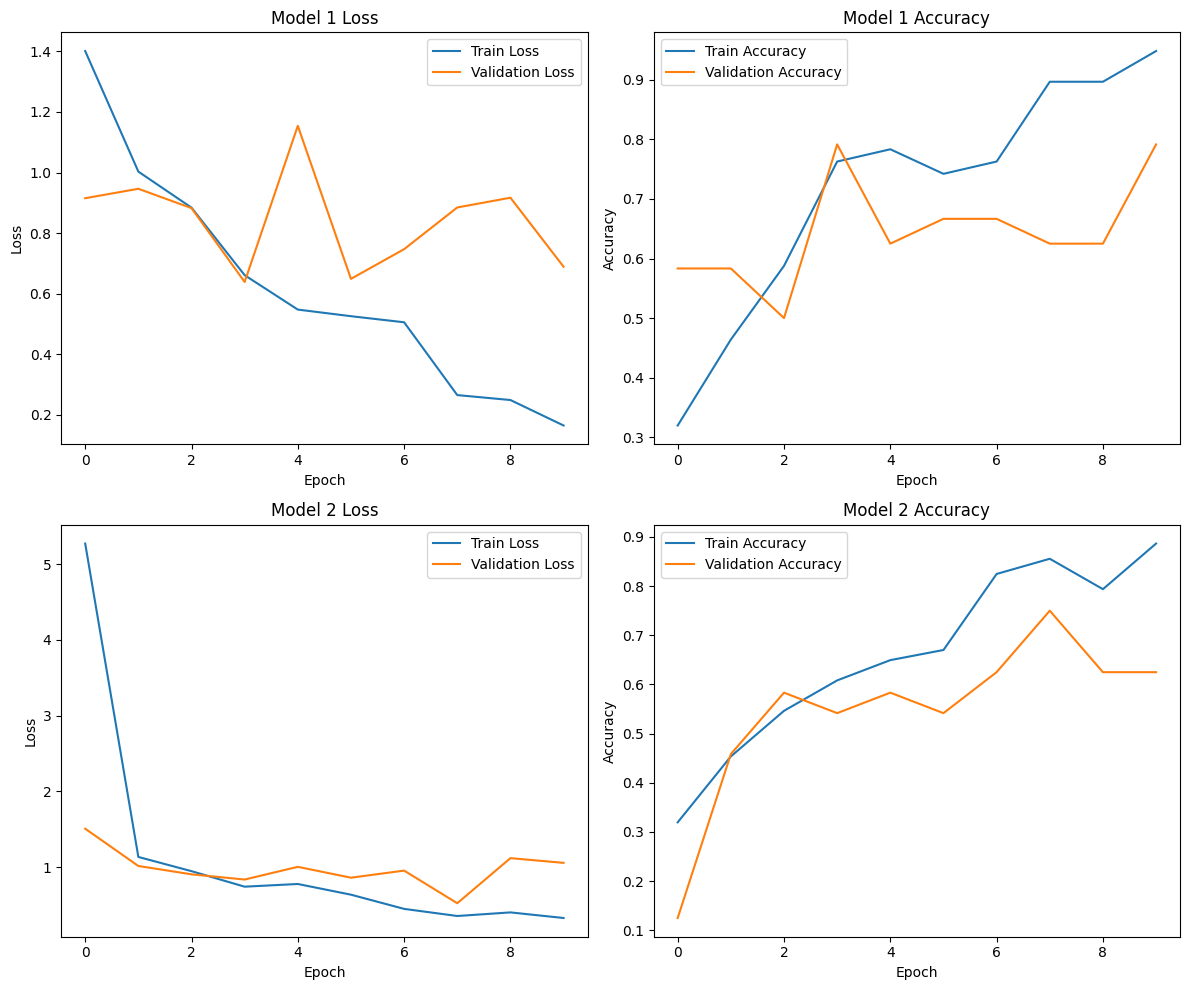

In [28]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Model 1 Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model 1 Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# Model 1 Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 1].set_title('Model 1 Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

# Model 2 Loss
axes[1, 0].plot(history2.history['loss'], label='Train Loss')
axes[1, 0].plot(history2.history['val_loss'], label='Validation Loss')
axes[1, 0].set_title('Model 2 Loss')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# Model 2 Accuracy
axes[1, 1].plot(history2.history['accuracy'], label='Train Accuracy')
axes[1, 1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axes[1, 1].set_title('Model 2 Accuracy')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


In [29]:
import tensorflow as tf
import numpy as np
import pathlib

# Define the paths to the test images
test_paths = [
    "drive/MyDrive/ColabNotebooks/weather/cloudy291.jpg",
    "drive/MyDrive/ColabNotebooks/weather/shine40.jpg",
    "drive/MyDrive/ColabNotebooks/weather/rain5.jpg",
    "drive/MyDrive/ColabNotebooks/weather/cloudy290.jpg",
    "drive/MyDrive/ColabNotebooks/weather/rain8.jpg"
]

# Initialize variables to accumulate scores
total_scores = 0.0
num_tests = 0

# Iterate through the test images
for test_path in test_paths:
    test_path = pathlib.Path(test_path)

    img = tf.keras.utils.load_img(test_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])


    total_scores += score
    num_tests += 1
    print(
        "Image {} most likely belongs to {} with a {:.2f} percent confidence."
        .format(test_path, class_names[np.argmax(score)], 100 * np.max(score))
    )




1/1 [==============================] - 0s 142ms/step
Image drive/MyDrive/ColabNotebooks/weather/cloudy291.jpg most likely belongs to rain with a 82.19 percent confidence.
1/1 [==============================] - 0s 33ms/step
Image drive/MyDrive/ColabNotebooks/weather/shine40.jpg most likely belongs to shine with a 99.21 percent confidence.
1/1 [==============================] - 0s 43ms/step
Image drive/MyDrive/ColabNotebooks/weather/rain5.jpg most likely belongs to rain with a 75.75 percent confidence.
1/1 [==============================] - 0s 32ms/step
Image drive/MyDrive/ColabNotebooks/weather/cloudy290.jpg most likely belongs to rain with a 65.68 percent confidence.
1/1 [==============================] - 0s 32ms/step
Image drive/MyDrive/ColabNotebooks/weather/rain8.jpg most likely belongs to rain with a 99.39 percent confidence.


In [30]:
total_scores

# Calculate the average confidence
average_score = total_scores / num_tests
average_score

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.14935306, 0.6461035 , 0.20454343], dtype=float32)>